In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_excel("./Metrics/Final Metrics.xlsx")

In [8]:
# Prepare data for bar chart
methods = ["RAG Only", "RAG + LLM"]
values = [rag_mean, llm_mean]

plt.figure(figsize=(8, 5))

plt.bar(methods, values)

plt.ylabel("Average Top-1 Accuracy")
plt.title("Overall Comparison: RAG vs RAG-with-LLM Top-1 Accuracy")
plt.ylim(0, 1)  # keep scale consistent for accuracy
plt.tight_layout()
plt.show()

NameError: name 'rag_mean' is not defined

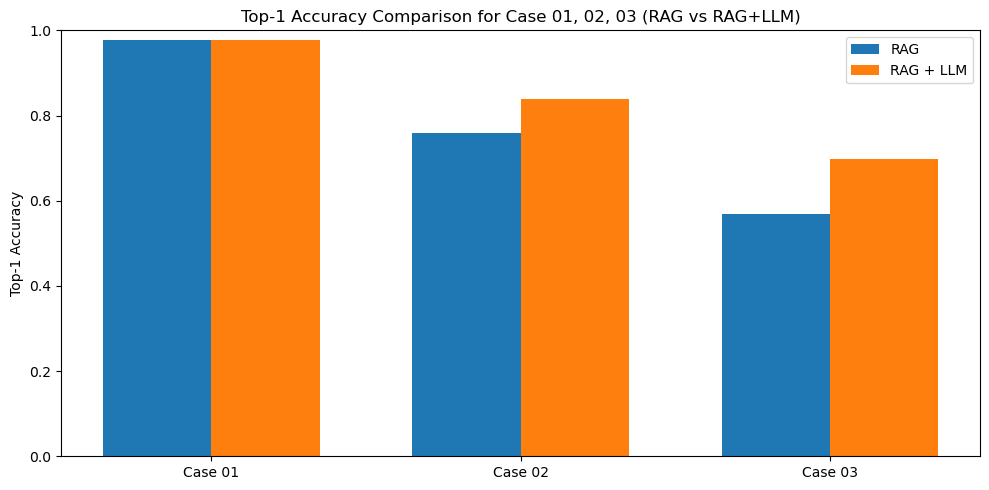

In [10]:
rag_df = pd.read_csv("./Metrics/RAG.csv")
llm_df = pd.read_csv("./Metrics/LLM.csv")
# Filter for Case 01, 02, 03 only
cases = ["Case 01", "Case 02", "Case 03"]

# Compute average Top-1 accuracy per case
rag_case_scores = rag_df.groupby("Case")["Top-1"].mean()
llm_case_scores = llm_df.groupby("Case")["Top-1"].mean()

# Prepare bar chart
labels = cases
x = np.arange(len(labels))  # bar positions
width = 0.35

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, rag_case_scores, width, label="RAG")
plt.bar(x + width/2, llm_case_scores, width, label="RAG + LLM")

plt.xticks(x, labels)
plt.ylabel("Top-1 Accuracy")
plt.title("Top-1 Accuracy Comparison for Case 01, 02, 03 (RAG vs RAG+LLM)")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

plt.show()

In [18]:
rag_df

,Case,K,Sample,Top-1,Top-3,Precision,Recall,F1 Score
0,Case 01,3,1000,0.9770,1.0000,0.9550,0.9550,0.9550
1,Case 02,3,1000,0.9310,0.9920,0.8732,0.8742,0.8736
2,Case 03,3,1000,0.7580,0.9330,0.6147,0.6239,0.6177
3,Case 04,3,1000,0.7080,0.9030,0.5526,0.5619,0.5557
4,Case 05,3,300,0.5667,0.7800,0.3886,0.2936,0.3218
5,Case 06,3,300,0.5633,0.7667,0.3911,0.2789,0.3129
6,Case 01,7,1000,0.9760,1.0000,0.9531,0.9531,0.9531
7,Case 02,7,1000,0.9300,0.9890,0.8711,0.8716,0.8713
8,Case 03,7,1000,0.7580,0.9690,0.6147,0.6239,0.6177
9,Case 04,7,1000,0.7100,0.9510,0.5547,0.5639,0.5577


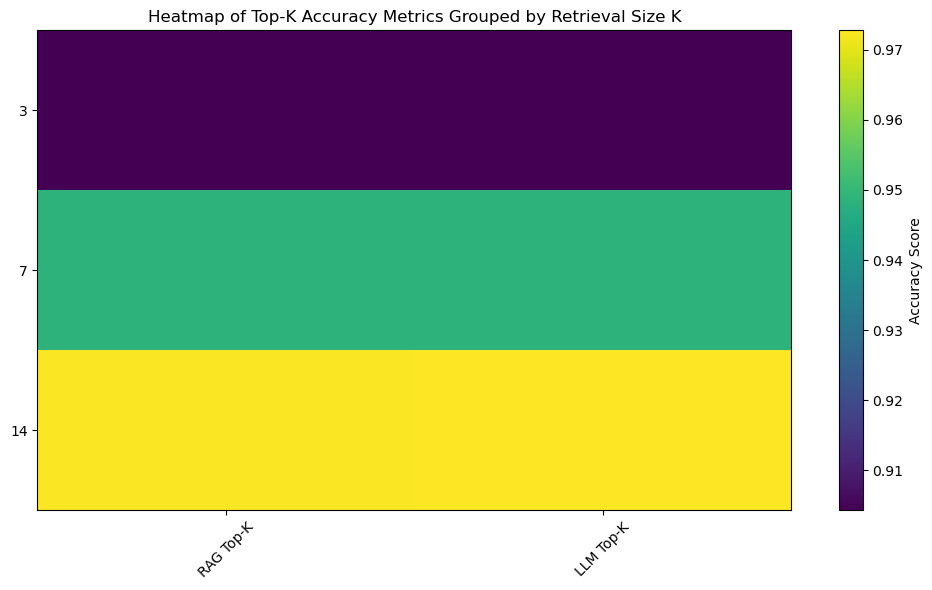

In [11]:
rag_df = pd.read_csv("./Metrics/RAG.csv")
llm_df = pd.read_csv("./Metrics/LLM.csv")

metrics = ["Top-K"]

# Step 1: Compute average metric scores grouped by K
rag_grouped = rag_df.groupby("K")[metrics].mean()
llm_grouped = llm_df.groupby("K")[metrics].mean()

# Step 2: Build a combined heatmap table
# Rows = K values, Columns = RAG / LLM × metrics
heatmap_df = pd.DataFrame()

for metric in metrics:
    heatmap_df[f"RAG {metric}"] = rag_grouped[metric]
    heatmap_df[f"LLM {metric}"] = llm_grouped[metric]

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_df, aspect='auto')

# Labels
plt.xticks(ticks=np.arange(len(heatmap_df.columns)), labels=heatmap_df.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_df.index)), labels=heatmap_df.index)

plt.colorbar(label="Accuracy Score")
plt.title("Heatmap of Top-K Accuracy Metrics Grouped by Retrieval Size K")
plt.tight_layout()
plt.show()